In [123]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
general_path = '../Data'

titlesize = 20
labelsize = 13

In [124]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/pop/pop.00000.wav')
pop0, _ = librosa.effects.trim(y)

In [125]:
features_30_sec = pd.read_csv(f'{general_path}/features_30_sec.csv')

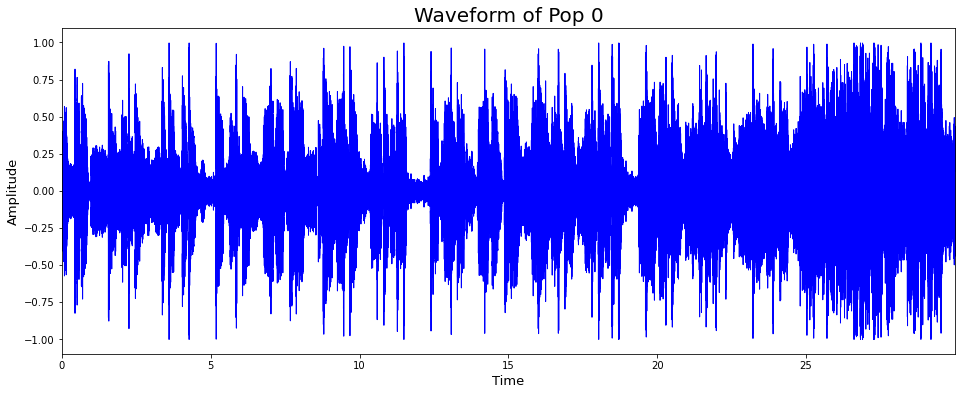

In [126]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = pop0, sr = sr, color = "blue")
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Amplitude", fontsize=labelsize)
title = plt.title("Waveform of Pop 0", fontsize = titlesize)
plt.savefig("../plots/data_vis/waveform_pop_0.jpg")

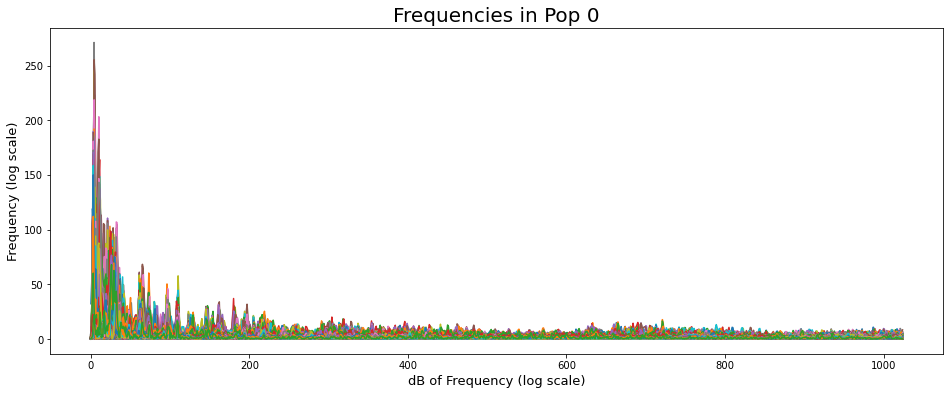

In [127]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
fft = np.abs(librosa.stft(pop0, n_fft = n_fft, hop_length = hop_length))

freqs = plt.figure(figsize = (16, 6))
plt.title("Frequencies in Pop 0", fontsize=titlesize)
plt.xlabel("dB of Frequency (log scale)", fontsize=labelsize)
plt.ylabel("Frequency (log scale)", fontsize=labelsize)
fft_graph = plt.plot(fft)
plt.savefig("../plots/data_vis/fft_pop_0.jpg")

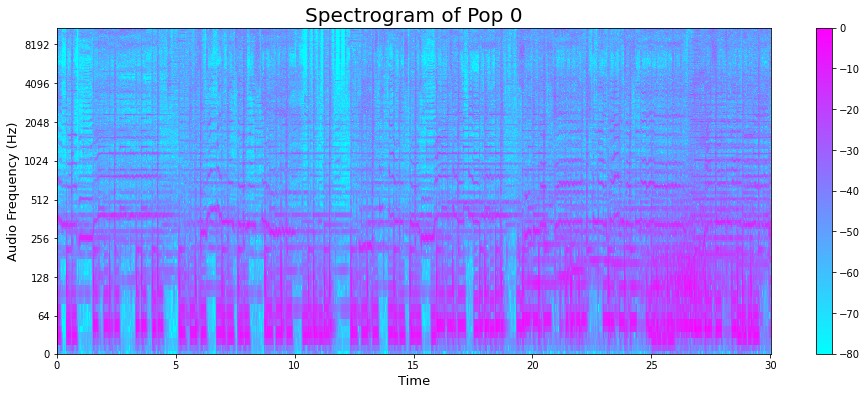

In [128]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.title("Spectrogram of Pop 0", fontsize=titlesize)
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Audio Frequency (Hz)", fontsize=labelsize)
bar = plt.colorbar()
plt.savefig("../plots/data_vis/spectrogram_pop_0.jpg")

In [129]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(pop0, pad=False)
print(sum(zero_crossings))

83949


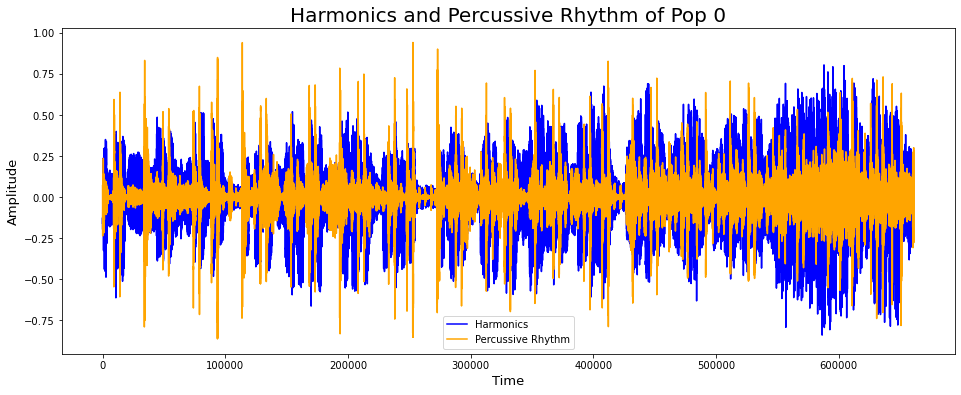

In [130]:
y_harm, y_perc = librosa.effects.hpss(pop0)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = 'blue', label="Harmonics")
plt.plot(y_perc, color = 'orange', label="Percussive Rhythm")
plt.title("Harmonics and Percussive Rhythm of Pop 0", fontsize=titlesize)
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Amplitude", fontsize=labelsize)
legend = plt.legend()
plt.savefig("../plots/data_vis/harmonics_and_rhythm_pop_0.jpg")

In [131]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

89.10290948275862

In [132]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(pop0, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

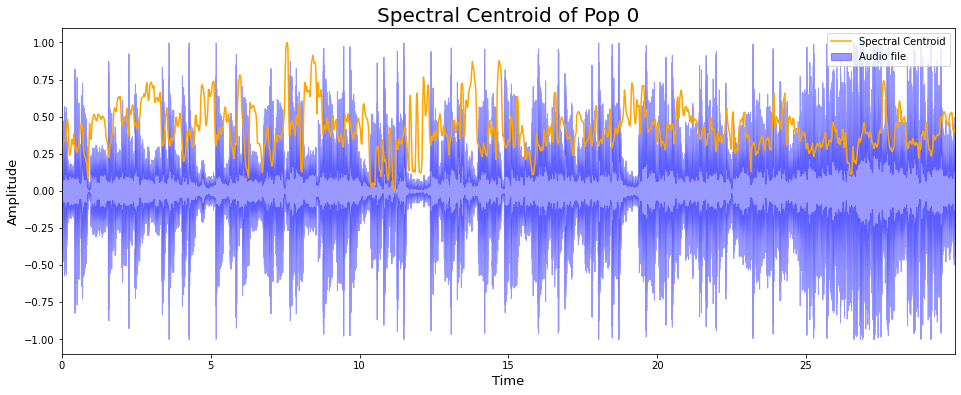

In [133]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(pop0, sr=sr, alpha=0.4, color = 'blue', label="Audio file")
plt.plot(t, normalize(spectral_centroids), color='orange', label="Spectral Centroid")
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Amplitude", fontsize=labelsize)
plt.title("Spectral Centroid of Pop 0", fontsize=titlesize)
legend = plt.legend()
plt.savefig("../plots/data_vis/spectral_centroid_pop_0.jpg")

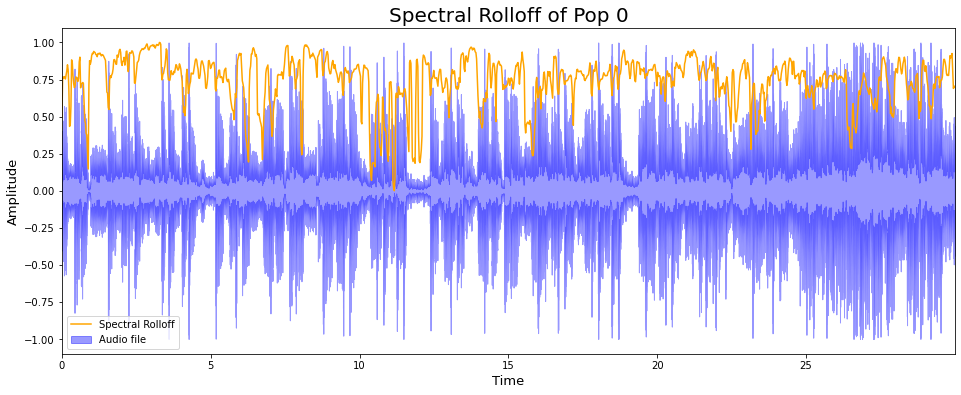

In [134]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(pop0, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(pop0, sr=sr, alpha=0.4, color = 'blue', label="Audio file")
plt.plot(t, normalize(spectral_rolloff), color='orange', label="Spectral Rolloff")
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Amplitude", fontsize=labelsize)
plt.title("Spectral Rolloff of Pop 0", fontsize=titlesize)
legend = plt.legend()
plt.savefig("../plots/data_vis/spectral_rolloff_pop_0.jpg")

mfccs shape: (20, 1293)


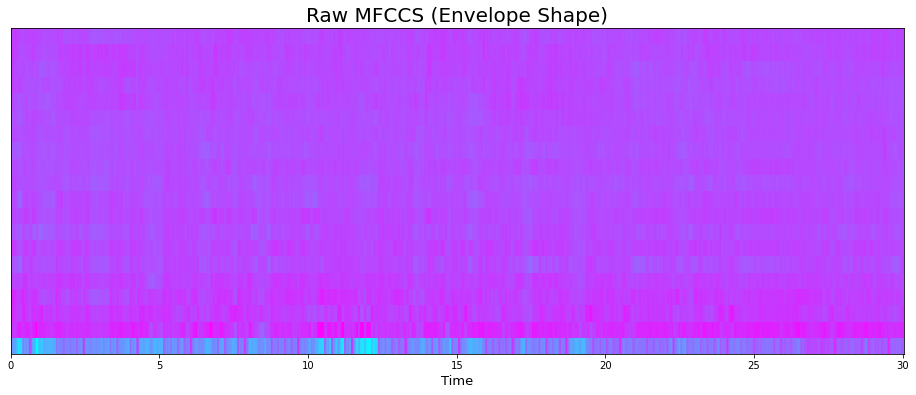

In [135]:
mfccs = librosa.feature.mfcc(pop0, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool', label="MFCCS (Envelope Shape)")
plt.xlabel("Time", fontsize=labelsize)
title = plt.title("Raw MFCCS (Envelope Shape)", fontsize=titlesize)
plt.savefig("../plots/data_vis/mfccs_raw_pop_0.jpg")

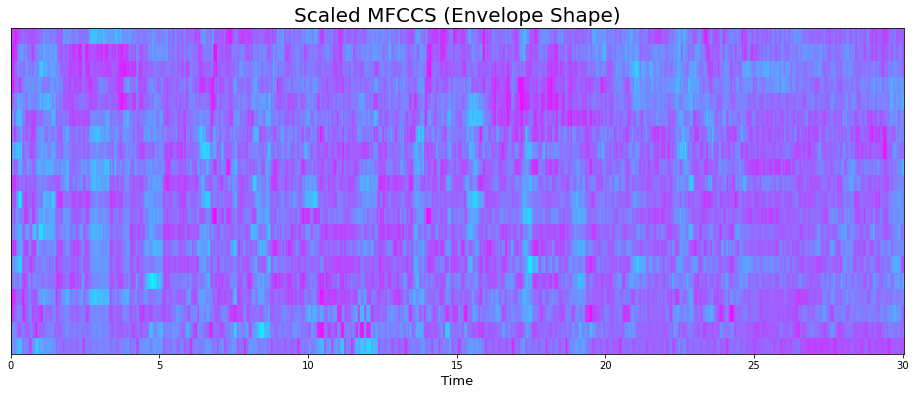

In [136]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool')
plt.xlabel("Time", fontsize=labelsize)
title = plt.title("Scaled MFCCS (Envelope Shape)", fontsize=titlesize)
plt.savefig("../plots/data_vis/mfccs_scaled_pop_0.jpg")

Chromogram shape: (12, 133)


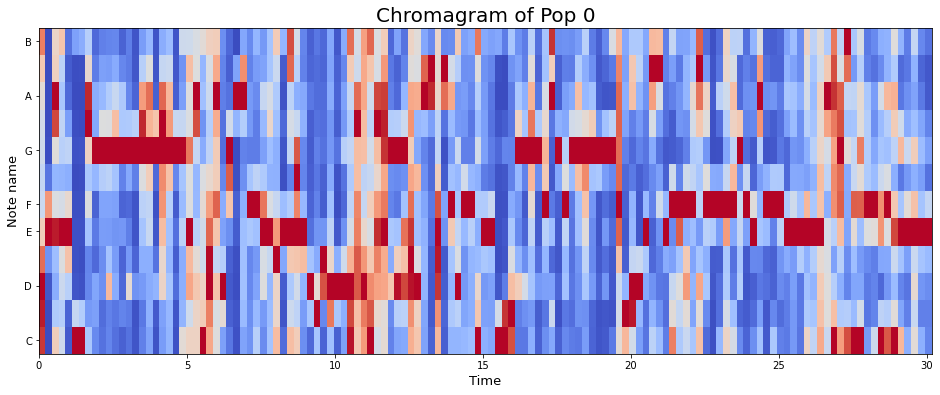

In [137]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(pop0, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.xlabel("Time", fontsize=labelsize)
plt.ylabel("Note name", fontsize=labelsize)
title = plt.title("Chromagram of Pop 0", fontsize=titlesize)
plt.savefig("../plots/data_vis/chromagram_pop_0.jpg")

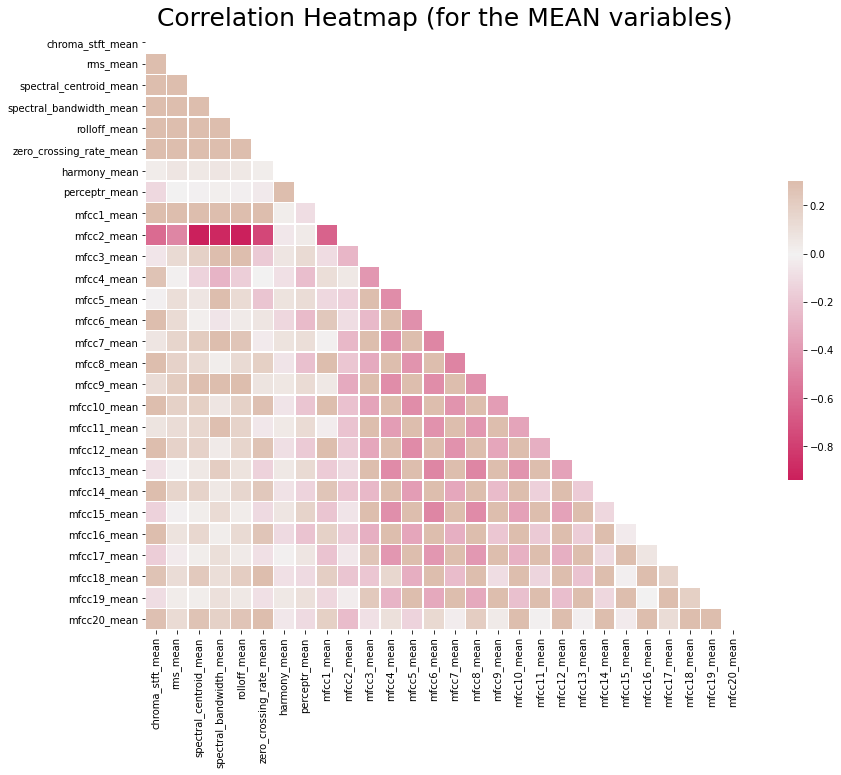

In [138]:
spike_cols = [col for col in features_30_sec.columns if 'mean' in col]
corr = features_30_sec[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
yticks = plt.yticks(fontsize = 10)
plt.savefig("../plots/data_vis/corr_heatmap_mean.jpg")

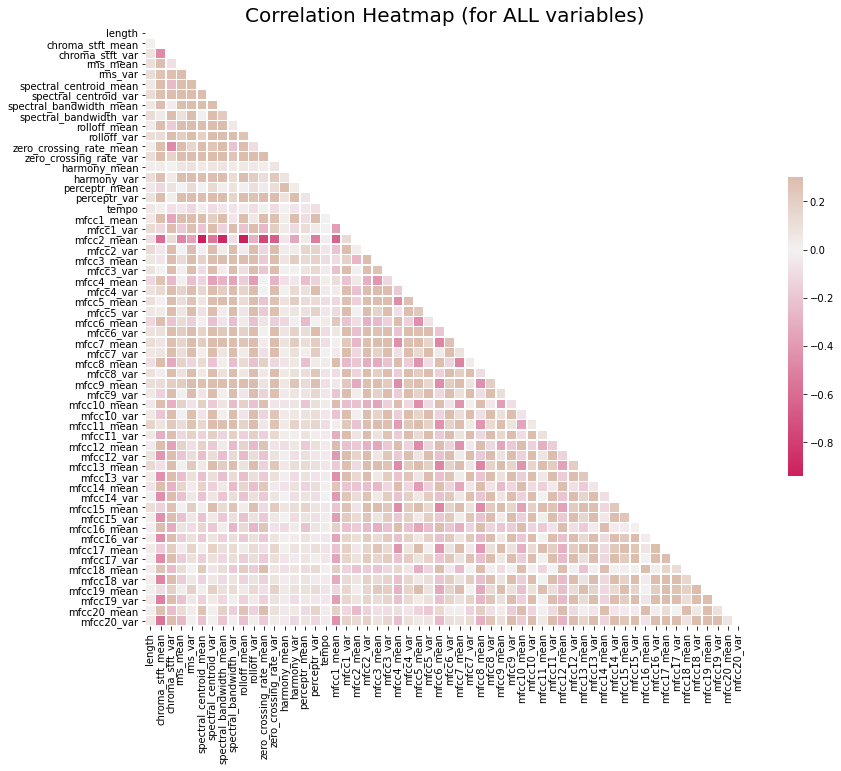

In [139]:
spike_cols = [col for col in features_30_sec.columns]
corr = features_30_sec[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for ALL variables)', fontsize = titlesize)
plt.xticks(fontsize = 10)
yticks = plt.yticks(fontsize = 10)
plt.savefig("../plots/data_vis/corr_heatmap_all.jpg")

In [140]:
from sklearn import preprocessing

data = features_30_sec.iloc[0:, 1:]
y = features_30_sec['label']
X = features_30_sec.loc[:, (features_30_sec.columns != 'label') & (features_30_sec.columns != 'filename')]

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

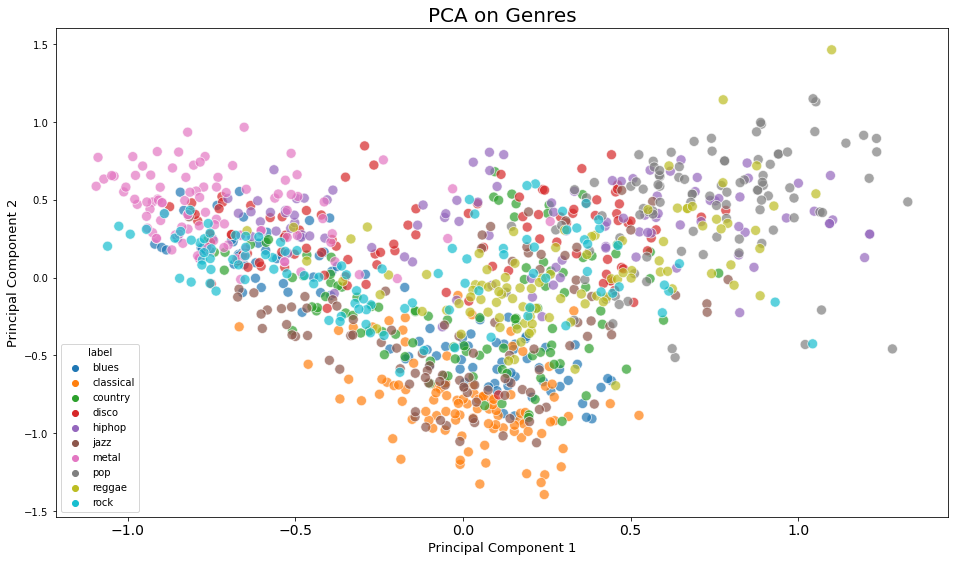

In [141]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100)

plt.title('PCA on Genres', fontsize = titlesize)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Principal Component 1", fontsize = labelsize)
ylabel = plt.ylabel("Principal Component 2", fontsize = labelsize)